<a href="https://colab.research.google.com/github/zihvvan/DataAnalysis/blob/main/zihvvan/ch06_03_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84_%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터프레임의 합성

* `numpy` 배열을 합치는 것
  * `concatenate`, `vstack`(열 사이즈), `hstack`(행)
  * `dstack`(m x n), `stack`(m x n) ... 모양이 맞는 것들을 연결

> 1:1로 연결

|이름|전화번호|
|-|-|
|김제육|010-xxxx-xxxx|
|이김치|010-xxxx-xxxx|

|이름|주소|
|-|-|
|김제육|서울시 제육구|
|이김치|경기도 김치시|

↓

|이름|전화번호|주소|
|-|-|-|
|김제육|010-xxxx-xxxx|서울시 제육구|
|이김치|010-xxxx-xxxx|경기도 김치시|

`이름` : `공통 열`
행 라벨 -> 열, 이름. 행 인덱스
0~10....

> 1:M 로 연결

|이름|주소|
|-|-|
|A|서울시|
|B|경기도|
|C|서울시|
|D|울산시|

|주소|지원금|
|-|-|
|서울시|10000|
|경기도|11100|
|인천시|20000|

↓

|이름|주소|지원금|
|-|-|-|
|A|서울시|10000|
|B|경기도|11100|
|C|서울시|10000|

## `merge` (두 개 이상의 데이터프레임을 join, 연결)

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1 # 고객 목록

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2 # 구매 기록

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [ ]:
# merge : 결합하다 -> pandas.merge(df1, df2) # df1 (left), df2 (right)
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left = df1, right = df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left = df2, right = df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


In [ ]:
pd.merge(left = df1, right = df2, on="고객번호")

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left = df1, right = df2, on="고객번호", how='inner')
# inner join : (기준되는 열) 양쪽 데이터프레임에 모두 속하는 원소들만 남겨줌

In [ ]:
df1.고객번호.unique()

array([1001, 1002, 1003, 1004, 1005, 1006, 1007])

In [ ]:
df2.고객번호.unique()

array([1001, 1005, 1006, 1008])

In [ ]:
pd.merge(df1, df2, how='inner') # default

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
# 왼쪽 오른쪽 안가리고, 고객번호에 값이 있다면 다 가져오겠다
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [ ]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [ ]:
df1.품종.value_counts()

setosa       2
virginica    2
Name: 품종, dtype: int64

In [ ]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [ ]:
df2.품종.value_counts()

virginica     2
setosa        1
versicolor    1
Name: 품종, dtype: int64

In [ ]:
pd.merge(df1, df2)
# 1. 공통으로 존재하는 열을 찾음 (품종)
# 2. 품종들이 몇개씩 있는지 -> 같은 열에 동일한 원소가 여러 개
# -> 원소들끼리의 모든 경우의 수 (조합)을 만들어냄
# 3. inner (df1, df2가 모두 존재하는 걸로만 연결)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [ ]:
pd.merge(df1, df2, how='outer')

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5
6,versicolor,NaN,0.3


### 연결되면 안되는 열의 이름이 같을 때

In [ ]:
# 두 df에서 이름이 같은 열은 모두 연결하는 기준 (키=on)
# 이름은 같아도 키가 되면 안되는 열 => `on` 무엇을 기준을 할지 명시
# (학생) 수업ID / 이름 (학생의 이름)
# (수업) 수업ID / 이름 (수업의 이름)
# -> on=[수업ID, 이름] ??? -> on='수업ID'
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [ ]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [ ]:
# pd.merge(df1, df2)
pd.merge(df1, df2, on=['고객명', '데이터'])

,고객명,날짜,데이터


In [ ]:
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [ ]:
# prefix -> 접두사
# suffix -> 접미사
pd.merge(df1, df2, on='고객명', suffixes=["_A", "_B"])

,고객명,날짜,데이터_A,데이터_B
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 연결하는 기준이 되는 열들의 이름이 다를 때

In [ ]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [ ]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2 # df2['이름'] = df2['성명'], df2.drop...['성명']??, rename...

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [ ]:
pd.merge(df1, df2)

MergeError: ignored

In [ ]:
# pd.merge(df1, df2, left_on='이름', right_on='성명')
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [ ]:
df01 = pd.merge(df1, df2, left_on='이름', right_on='성명')
df01.drop('성명', inplace=True, axis=1)
df01

,이름,성적,성적2
0,영희,1,4
1,영희,1,5
2,철수,2,6
3,철수,3,6


### 인덱스를 기준으로 합쳐주고 싶을 때

In [ ]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [ ]:
import numpy as np

df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [ ]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [ ]:
df2.reset_index()

,level_0,level_1,데이터1,데이터2
0,부산,2000,0,1
1,부산,2005,2,3
2,서울,2000,4,5
3,서울,2005,6,7
4,서울,2010,8,9
5,서울,2015,10,11


In [ ]:
pd.merge(df1, df2.reset_index(),
         left_on=['도시', '연도'],
         right_on=['level_0', 'level_1'])

,도시,연도,인구,level_0,level_1,데이터1,데이터2
0,서울,2000,9853972,서울,2000,4,5
1,서울,2005,9762546,서울,2005,6,7
2,서울,2010,9631482,서울,2010,8,9
3,부산,2000,3655437,부산,2000,0,1
4,부산,2005,3512547,부산,2005,2,3


### `join`을 통한 합성

In [ ]:
# pd.merge(left, right, ...) # on? index?... how?
# df1 -> left
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df1, df2

(          품종  꽃잎길이
 0     setosa   1.4
 1     setosa   1.3
 2  virginica   1.5
 3  virginica   1.3,            품종  꽃잎너비
 0      setosa   0.4
 1   virginica   0.3
 2   virginica   0.5
 3  versicolor   0.3)

In [ ]:
df1.join(df2)

ValueError: ignored

In [ ]:
# join : 두 개의 df을 인덱스 기준으로 합쳐주는 메소드
df1.join(df2, lsuffix='l', rsuffix='r') # join -> index를 기준으로 합쳐버림

,품종l,꽃잎길이,품종r,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


In [ ]:
df1.set_index('품종').join(df2.set_index('품종'))

,꽃잎길이,꽃잎너비
품종,,
setosa,1.4,0.4
setosa,1.3,0.4
virginica,1.5,0.3
virginica,1.5,0.5
virginica,1.3,0.3
virginica,1.3,0.5


### `merge`
- 두 데이터프레임 사이의 크기가 같을 필요가 없음 (기준이 되는 열, 인덱스를 바탕으로 outer, inner... 내용들을 재구성
- `on` ... -> 어떠한 열을 기준으로 해줄까? `index`...
- 두 개의 데이터가 공통 분모만 있다면 (키) 연결
- 열 기준으로 연결할 필요가 없다? `join` -> 인덱스를 기준

## `concat`
* `merge` : 특정한 열을 기준(또는 인덱스)으로 해서 연결
* `concat` : 기준 열을 사용하지 않고 데이터를 연결(붙임) - np.concatenate, vstack, hstack...

In [ ]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [ ]:
s1

A    0
B    1
dtype: int64

In [ ]:
s2

A    2
B    3
C    4
dtype: int64

In [ ]:
# pd.concat
pd.concat([s1, s2])
pd.concat([s1, s2], axis=0)

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [ ]:
pd.concat([s1, s2], axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


# 피봇테이블과 그룹 분석

## 피봇테이블
* Pivot Table : 데이터 열 중에서 두 개의 열을 각각 행과 열 인덱스로 사용해서 데이터를 조회해 놓은 것
* 엑셀 -> 피봇테이블
* Pandas -> 피봇테이블 `pivot` (행 인덱스로 사용할 열이름, 열 인덱스로 사용할 열 이름)

In [1]:
import pandas as pd

In [2]:
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]

In [3]:
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [4]:
# 행 인덱스, 열 인덱스, 묶어줄 데이터 
df1.pivot('도시', '연도', '인구') # 행/열 인덱스를 만족시키는 데이터가 없으면 NaN

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [5]:
# 조건을 만족시키는 데이터가 2개 이상일 경우에는 pivot table X
df1.pivot('지역', '연도', '인구')

ValueError: ignored

In [7]:
df1.set_index(['도시', '연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

## 그룹분석
* 조건에 맞는 데이터가 하나 이상일 경우에 -> 데이터 그룹을 이룸 (피봇 테이블 형태로 표현을 X)
* 그룹의 특성을 보여주는 (통계치, 계산...) => 그룹 분석 (group analysis)
* group -> `groupby`

1. 분석하고자 하는 Series, df에 `groupby` 메소드 호출 -> 그룹화
1. 그룹화 -> 그룹 객체 -> 그룹 연산

### groupby 메소드
* 데이터를 그룹별로 분류하는 역할.
    * 열 또는 열의 리스트 (어떤 열을 기준으로 그룹을 넣어줄 것이냐
    * 행 인덱스
=> GroupBy (그룹화) => 그룹 함수 or 그룹 연산 => 특정한 값. 배열...

In [ ]:
import numpy as np

In [10]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    5 non-null      object
 1   key2    5 non-null      object
 2   data1   5 non-null      int64 
 3   data2   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [12]:
# groups = df2.groupby(df2.key1)
groups = df2.groupby(df2['key1'])
groups

In [14]:
# groupby.groups(속성) : 그룹별 구성 현황 (행 인덱스)
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [16]:
groups.count() # 데이터 세는 것. nan 빼고

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


In [17]:
df3 = df2.copy()
df3.iloc[1,1] = np.nan
df3

,key1,key2,data1,data2
0,A,one,1,10
1,A,NaN,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [18]:
df3.groupby(df3.key1).count()

,key2,data1,data2
key1,,,
A,2,3,3
B,2,2,2


In [19]:
groups.size() # 그룹 데이터의 행의 개수

key1
A    3
B    2
dtype: int64

In [20]:
df3.groupby(df3.key1).size()

key1
A    3
B    2
dtype: int64

In [21]:
# 평균
groups.mean()

,data1,data2
key1,,
A,2.666667,26.666667
B,3.500000,35.000000


In [22]:
# 중앙값 (median)
groups.median()

,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [23]:
# 최대값
groups.max()

,key2,data1,data2
key1,,,
A,two,5,50
B,two,4,40


In [24]:
# 최소값
groups.min()

,key2,data1,data2
key1,,,
A,one,1,10
B,one,3,30


In [25]:
# 합계
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [26]:
# 일괄적으로 곱함
groups.prod()

,data1,data2
key1,,
A,10,10000
B,12,1200


In [27]:
# 표준편차, 분산, 중간값(50%)
groups.std()

,data1,data2
key1,,
A,2.081666,20.816660
B,0.707107,7.071068


In [28]:
groups.var()

,data1,data2
key1,,
A,4.333333,433.333333
B,0.500000,50.000000


In [30]:
groups.quantile(0.5)

<ipython-input-30-df97294cd3b1>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.5)


,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [31]:
groups.quantile(0.25)

<ipython-input-31-de6ad5660f10>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.25)


,data1,data2
key1,,
A,1.50,15.0
B,3.25,32.5


In [32]:
groups.quantile(0.75)

<ipython-input-32-03a439ba554f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.75)


,data1,data2
key1,,
A,3.50,35.0
B,3.75,37.5


In [35]:
# groups.quantile(0.75).data1
groups.quantile(0.75)['data1']

<ipython-input-35-888a55ee024e>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.75)['data1']


key1
A    3.50
B    3.75
Name: data1, dtype: float64

### 복합키

In [41]:
# df.groupby([key1, key2])
# df1.groupby('도시')['인구'].sum()
# df1.groupby('지역')['인구'].sum()
df1.groupby(['지역','도시'])[['인구']].sum()
df1.groupby(['지역','도시']).sum()[['인구']]

인구
지역  도시          
경상권 부산  10354475
수도권 서울  29298340
    인천   3153654

In [44]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [43]:
# unstack -> 인덱스 중에 하나를 정해서, 해당 인덱스를 열로 다시 배치
df2.data1.groupby([df2.key1, df2.key2]).sum().unstack('key2')

key2,one,two
key1,,
A,6,2
B,3,4


In [45]:
# 2개 이상의 키를 사용해주려면 [] 담아야함
# df1.groupby([df1.지역, df1.연도]).sum()
df1.groupby([df1.지역, df1.연도]).sum().unstack('연도')

인구                   
연도      2005     2010      2015
지역                             
경상권  3512547  3393191   3448737
수도권  9762546  9894685  12794763

### agg (aggregate)

In [46]:
import seaborn as sns # 예시 데이터들을 불러올 수 있음
iris = sns.load_dataset('iris') # 붓꽃
iris # 붓꽃의 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [54]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

In [55]:
# 각 붓꽃의 종별로 (열별로) 가장 큰 값과 가장 작은 값의 비율을 구해보기
# sepal (꽃받침) / petal (꽃잎)
# iris.groupby(iris.species).agg(lambda x: x.max()/ x.min())
iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [56]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
iris.groupby(iris.species).agg(lambda x: x.max()/ x.min())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


* `agg` : 그룹 들의 대표값
* `apply` : 그룹들로 나뉘어진 행에 대해서 반복적 연산

In [58]:
# 꽃잎의 길이가 가장 긴 상위 3개를 뽑는다
def top3_petal_length(df): # group
    # 내림차순 (큰게 위로...)
    return df.sort_values(by='petal_length', ascending=False)[:3] # 0, 1, 2
def top1_petal_length(df): # group
    # 내림차순 (큰게 위로...)
    return df.sort_values(by='petal_length', ascending=False)[:1] # 0, 1, 2

iris.groupby(iris.species).apply(top3_petal_length)
iris.groupby(iris.species).apply(top1_petal_length)

,,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,,
setosa,24,4.8,3.4,1.9,0.2,setosa
versicolor,83,6.0,2.7,5.1,1.6,versicolor
virginica,118,7.7,2.6,6.9,2.3,virginica


# 시계열 자료 다루기
* 인덱스가 시간 또는 날짜인 데이터 -> 순서가 시간/날짜 데이터에 따라 정해져있음
* 시계열 데이터의 인덱스 `DatetimeIndex`
```
2022-12-09 <- 텍스트 형태로 인덱스가 제공. => `DatetimeIndex`
```
* 꼭 일정 기간에 꽉차져있는 형태로 인덱스가 X (날짜 형식만 지키면 됨)
---
* `pd.to_datetime`
* `pd.date_range`

In [61]:
# pd.to_datetime => (시간, 날짜 형태로 표현된 데이터들의 나열된 리스트...) => DatetimeIndex
date_str = ['2023. 1. 1', '2023. 1. 4', '2023. 1. 5', '2023. 1. 6']
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2023-01-01', '2023-01-04', '2023-01-05', '2023-01-06'], dtype='datetime64[ns]', freq=None)

In [62]:
s = pd.Series(np.random.rand(len(idx)), index=idx)
s

2023-01-01    0.548814
2023-01-04    0.715189
2023-01-05    0.602763
2023-01-06    0.544883
dtype: float64

In [64]:
# pd.date_range : range, arange처럼 시작일/종료일 또는 시작일/기간을 입력하면 범위 내의 시간/날짜 인덱스를 생성
# 1. 시작일과 종료일
# pd.date_range('2023-4-1', '2023-4-30') # freq : 빈도. -> D (day)
pd.date_range('2023-4-1', '2023-4-30', freq='D') # freq : 빈도. -> D (day)

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

In [65]:
# 2. 시작일과 기간
# pd.date_range('2023-4-1', periods=30)
pd.date_range('2023-4-1', periods=30, freq='D')

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range('2023-4-1', periods=30, freq='M')

DatetimeIndex(['2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
               '2023-12-31', '2024-01-31', '2024-02-29', '2024-03-31',
               '2024-04-30', '2024-05-31', '2024-06-30', '2024-07-31',
               '2024-08-31', '2024-09-30', '2024-10-31', '2024-11-30',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30'],
              dtype='datetime64[ns]', freq='M')

In [67]:
pd.date_range('2023-4-1', periods=30, freq='MS')

DatetimeIndex(['2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01',
               '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01',
               '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01',
               '2025-08-01', '2025-09-01'],
              dtype='datetime64[ns]', freq='MS')

## `shift`

In [68]:
!pip install yfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 15.4 MB/s eta 0:00:00


In [70]:
import yfinance as yf

tqqq = yf.Ticker('TQQQ').history()
tqqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-02-14 00:00:00-05:00,24.540001,25.740000,24.049999,25.490000,255737200,0.0,0.0,0.0
2023-02-15 00:00:00-05:00,25.020000,26.100000,24.850000,26.059999,137763700,0.0,0.0,0.0
2023-02-16 00:00:00-05:00,24.830000,25.870001,24.530001,24.570000,194496500,0.0,0.0,0.0
2023-02-17 00:00:00-05:00,24.030001,24.230000,23.299999,24.040001,194902400,0.0,0.0,0.0
2023-02-21 00:00:00-05:00,23.100000,23.450001,22.290001,22.350000,150468800,0.0,0.0,0.0
2023-02-22 00:00:00-05:00,22.450001,22.850000,21.980000,22.370001,167338700,0.0,0.0,0.0
2023-02-23 00:00:00-05:00,23.190001,23.230000,21.950001,22.930000,179770000,0.0,0.0,0.0
2023-02-24 00:00:00-05:00,21.750000,22.030001,21.350000,21.770000,172781800,0.0,0.0,0.0
2023-02-27 00:00:00-05:00,22.480000,22.799999,22.100000,22.240000,138754400,0.0,0.0,0.0


In [71]:
df = tqqq[['Close']]
df

,Close
Date,
2023-02-14 00:00:00-05:00,25.490000
2023-02-15 00:00:00-05:00,26.059999
2023-02-16 00:00:00-05:00,24.570000
2023-02-17 00:00:00-05:00,24.040001
2023-02-21 00:00:00-05:00,22.350000
2023-02-22 00:00:00-05:00,22.370001
2023-02-23 00:00:00-05:00,22.930000
2023-02-24 00:00:00-05:00,21.770000
2023-02-27 00:00:00-05:00,22.240000


In [72]:
# 시계열의 데이터의 인덱스는 '시간'(순서) => 날짜 이동 => 전날/오늘 데이터 비교, 연산...
# 날짜/시간 -> DatetimeIndex => 인덱스는 그대로 두고 데이터만 이동
df

,Close
Date,
2023-02-14 00:00:00-05:00,25.490000
2023-02-15 00:00:00-05:00,26.059999
2023-02-16 00:00:00-05:00,24.570000
2023-02-17 00:00:00-05:00,24.040001
2023-02-21 00:00:00-05:00,22.350000
2023-02-22 00:00:00-05:00,22.370001
2023-02-23 00:00:00-05:00,22.930000
2023-02-24 00:00:00-05:00,21.770000
2023-02-27 00:00:00-05:00,22.240000


In [73]:
df.shift(1)

,Close
Date,
2023-02-14 00:00:00-05:00,NaN
2023-02-15 00:00:00-05:00,25.490000
2023-02-16 00:00:00-05:00,26.059999
2023-02-17 00:00:00-05:00,24.570000
2023-02-21 00:00:00-05:00,24.040001
2023-02-22 00:00:00-05:00,22.350000
2023-02-23 00:00:00-05:00,22.370001
2023-02-24 00:00:00-05:00,22.930000
2023-02-27 00:00:00-05:00,21.770000


In [75]:
df.shift(-1)

,Close
Date,
2023-02-14 00:00:00-05:00,26.059999
2023-02-15 00:00:00-05:00,24.570000
2023-02-16 00:00:00-05:00,24.040001
2023-02-17 00:00:00-05:00,22.350000
2023-02-21 00:00:00-05:00,22.370001
2023-02-22 00:00:00-05:00,22.930000
2023-02-23 00:00:00-05:00,21.770000
2023-02-24 00:00:00-05:00,22.240000
2023-02-27 00:00:00-05:00,22.129999


In [76]:
(df - df.shift(1)) / df.shift(1) * 100

,Close
Date,
2023-02-14 00:00:00-05:00,NaN
2023-02-15 00:00:00-05:00,2.236170
2023-02-16 00:00:00-05:00,-5.717574
2023-02-17 00:00:00-05:00,-2.157097
2023-02-21 00:00:00-05:00,-7.029952
2023-02-22 00:00:00-05:00,0.089488
2023-02-23 00:00:00-05:00,2.503350
2023-02-24 00:00:00-05:00,-5.058874
2023-02-27 00:00:00-05:00,2.158931


In [77]:
((df - df.shift(1)) / df.shift(1)).fillna(0).apply(lambda x: f"{x.Close * 100:.2f}%", axis=1)

Date
2023-02-14 00:00:00-05:00    Close   NaN\nName: 2023-02-14 00:00:00-05:00, ...
2023-02-15 00:00:00-05:00    Close    2.23617\nName: 2023-02-15 00:00:00-05...
2023-02-16 00:00:00-05:00    Close   -5.717574\nName: 2023-02-16 00:00:00-0...
2023-02-17 00:00:00-05:00    Close   -2.157097\nName: 2023-02-17 00:00:00-0...
2023-02-21 00:00:00-05:00    Close   -7.029952\nName: 2023-02-21 00:00:00-0...
2023-02-22 00:00:00-05:00    Close    0.089488\nName: 2023-02-22 00:00:00-0...
2023-02-23 00:00:00-05:00    Close    2.50335\nName: 2023-02-23 00:00:00-05...
2023-02-24 00:00:00-05:00    Close   -5.058874\nName: 2023-02-24 00:00:00-0...
2023-02-27 00:00:00-05:00    Close    2.158931\nName: 2023-02-27 00:00:00-0...
2023-02-28 00:00:00-05:00    Close   -0.494607\nName: 2023-02-28 00:00:00-0...
2023-03-01 00:00:00-05:00    Close   -2.440122\nName: 2023-03-01 00:00:00-0...
2023-03-02 00:00:00-05:00    Close    2.408525\nName: 2023-03-02 00:00:00-0...
2023-03-03 00:00:00-05:00    Close    6.105827\

In [78]:
df.index = df.index.date

array([datetime.date(2023, 2, 14), datetime.date(2023, 2, 15),
       datetime.date(2023, 2, 16), datetime.date(2023, 2, 17),
       datetime.date(2023, 2, 21), datetime.date(2023, 2, 22),
       datetime.date(2023, 2, 23), datetime.date(2023, 2, 24),
       datetime.date(2023, 2, 27), datetime.date(2023, 2, 28),
       datetime.date(2023, 3, 1), datetime.date(2023, 3, 2),
       datetime.date(2023, 3, 3), datetime.date(2023, 3, 6),
       datetime.date(2023, 3, 7), datetime.date(2023, 3, 8),
       datetime.date(2023, 3, 9), datetime.date(2023, 3, 10),
       datetime.date(2023, 3, 13)], dtype=object)

In [79]:
((df - df.shift(1)) / df.shift(1)).fillna(0).apply(lambda x: f"{x.Close * 100:.2f}%", axis=1)

Date
2023-02-14 00:00:00-05:00     0.00%
2023-02-15 00:00:00-05:00     2.24%
2023-02-16 00:00:00-05:00    -5.72%
2023-02-17 00:00:00-05:00    -2.16%
2023-02-21 00:00:00-05:00    -7.03%
2023-02-22 00:00:00-05:00     0.09%
2023-02-23 00:00:00-05:00     2.50%
2023-02-24 00:00:00-05:00    -5.06%
2023-02-27 00:00:00-05:00     2.16%
2023-02-28 00:00:00-05:00    -0.49%
2023-03-01 00:00:00-05:00    -2.44%
2023-03-02 00:00:00-05:00     2.41%
2023-03-03 00:00:00-05:00     6.11%
2023-03-06 00:00:00-05:00     0.43%
2023-03-07 00:00:00-05:00    -3.74%
2023-03-08 00:00:00-05:00     1.37%
2023-03-09 00:00:00-05:00    -5.26%
2023-03-10 00:00:00-05:00    -4.13%
2023-03-13 00:00:00-04:00     2.16%
dtype: object

### `resample` 연산
* 시간 간격을 재조정
* 시간 구간을 작게 만든다 -> 데이터 양이 증가 -> 업-샘플링(up-sampling)
* 시간 구간을 크게 만든다 -> 데이터 양이 감소 -> 다운-샘플링(down-sampling)

In [80]:
!pip install pyupbit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 11.7 MB/s eta 0:00:00


In [86]:
import pyupbit

In [87]:
pyupbit.get_tickers()

['KRW-BTC',
 'KRW-ETH',
 'BTC-ETH',
 'BTC-XRP',
 'BTC-ETC',
 'BTC-OMG',
 'BTC-CVC',
 'BTC-DGB',
 'BTC-SC',
 'BTC-SNT',
 'BTC-WAVES',
 'BTC-NMR',
 'BTC-XEM',
 'BTC-QTUM',
 'BTC-BAT',
 'BTC-LSK',
 'BTC-STEEM',
 'BTC-DOGE',
 'BTC-BNT',
 'BTC-XLM',
 'BTC-ARDR',
 'BTC-ARK',
 'BTC-STORJ',
 'BTC-GRS',
 'BTC-REP',
 'BTC-RLC',
 'USDT-BTC',
 'USDT-ETH',
 'USDT-XRP',
 'USDT-ETC',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'BTC-ADA',
 'BTC-MANA',
 'USDT-OMG',
 'KRW-SBD',
 'BTC-SBD',
 'KRW-POWR',
 'BTC-POWR',
 'KRW-BTG',
 'USDT-ADA',
 'BTC-DNT',
 'BTC-ZRX',
 'BTC-TRX',
 'BTC-TUSD',
 'BTC-LRC',
 'KRW-ICX',
 'KRW-EOS',
 'USDT-TUSD',
 'KRW-TRX',
 'BTC-POLYX',
 'USDT-SC',
 'USDT-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'BTC-BCH',
 'USDT-BCH',
 'KRW-BCH',
 'BTC-HIFI',
 'BTC-LOOM',
 'KR

In [90]:
# pyupbit.get_ohlcv("KRW-BTC")
eth = pyupbit.get_ohlcv("KRW-ETH")
eth

,open,high,low,close,volume,value
2022-08-27 09:00:00,2086000.0,2102000.0,2010000.0,2063000.0,65272.840858,1.346476e+11
2022-08-28 09:00:00,2063000.0,2090000.0,1975000.0,1979500.0,42888.047388,8.746746e+10
2022-08-29 09:00:00,1978000.0,2138000.0,1970500.0,2127000.0,74358.776692,1.523151e+11
2022-08-30 09:00:00,2126000.0,2203000.0,2047000.0,2103000.0,94895.856511,2.025001e+11
2022-08-31 09:00:00,2101000.0,2209000.0,2100000.0,2136000.0,89723.275812,1.941040e+11
...,...,...,...,...,...,...
2023-03-10 09:00:00,1948500.0,1949000.0,1870000.0,1936000.0,36619.652557,6.997561e+10
2023-03-11 09:00:00,1937000.0,1999500.0,1914500.0,1993500.0,33283.890899,6.527923e+10
2023-03-12 09:00:00,1992000.0,2109000.0,1947500.0,2098000.0,31187.493259,6.296181e+10
2023-03-13 09:00:00,2096000.0,2218000.0,2070000.0,2200000.0,56367.309004,1.210064e+11


In [94]:
pd.options.display.float_format =  '{:.2f}'.format
# pd.options.display.float_format =  '{:.4f}'.format

In [96]:
# 다운-샘플링 -> 시간을 더 크게 묶는 거 -> "D(Day)" => "Week?"
eth.resample('W').mean()

,open,high,low,close,volume,value
2022-08-28,2074500.00,2096000.00,1992500.00,2021250.00,54080.44,111057530171.32
2022-09-04,2120857.14,2196571.43,2089500.00,2148857.14,71225.35,152710639278.63
2022-09-11,2269000.00,2342857.14,2233428.57,2303000.00,69019.44,156572145547.15
2022-09-18,2205428.57,2245285.71,2088357.14,2131928.57,88247.16,192262318233.01
2022-09-25,1883428.57,1943285.71,1823071.43,1879285.71,64938.82,121817073668.57
2022-10-02,1904571.43,1942357.14,1864285.71,1904357.14,45323.35,86591211118.21
2022-10-09,1903785.71,1929357.14,1881714.29,1908285.71,26029.39,49822485783.38
2022-10-16,1854285.71,1885142.86,1820428.57,1853571.43,26851.00,49532247531.24
2022-10-23,1876000.00,1906142.86,1852714.29,1887071.43,20580.96,38735623075.15
2022-10-30,2104000.00,2196571.43,2073285.71,2144500.00,50755.59,109031713724.28


In [97]:
eth.resample('W').max().head()

,open,high,low,close,volume,value
2022-08-28,2086000.00,2102000.00,2010000.00,2063000.00,65272.84,134647599812.41
2022-09-04,2176000.00,2260000.00,2145000.00,2176000.00,97587.31,214881159136.77
2022-09-11,2414000.00,2431000.00,2373000.00,2416000.00,121839.91,275595198519.54
2022-09-18,2407000.00,2427000.00,2320000.00,2346000.00,176152.23,392510831420.48
2022-09-25,1941000.00,1977000.00,1880000.00,1940500.00,94088.49,177102460467.97


In [98]:
eth.resample('W').min().head()

,open,high,low,close,volume,value
2022-08-28,2063000.00,2090000.00,1975000.00,1979500.00,42888.05,87467460530.23
2022-09-04,1978000.00,2138000.00,1970500.00,2103000.00,28386.66,61221611093.16
2022-09-11,2174000.00,2247000.00,2103000.00,2183000.00,38460.47,92397900399.17
2022-09-18,2025000.00,2060000.00,1872000.00,1891500.00,46838.08,95011724297.90
2022-09-25,1791000.00,1916500.00,1758000.00,1792000.00,31052.70,58503477533.69


In [101]:
# .first / .last : 맨 앞과 맨 마지막
eth.resample('MS').first()

,open,high,low,close,volume,value
2022-08-01,2086000.00,2102000.00,2010000.00,2063000.00,65272.84,134647599812.41
2022-09-01,2136000.00,2193000.00,2098000.00,2175000.00,76365.26,163585697814.20
2022-10-01,1909000.00,1920000.00,1884500.00,1896500.00,16267.93,31001648371.88
2022-11-01,2207000.00,2250000.00,2200000.00,2218000.00,26295.82,58476358599.09
2022-12-01,1752500.00,1754500.00,1710000.00,1729000.00,29415.61,50990524695.35
2023-01-01,1524000.00,1535500.00,1519000.00,1528000.00,6939.25,10585761629.68
2023-02-01,1992500.00,2060000.00,1957500.00,2048000.00,32184.49,64638302315.18
2023-03-01,2153000.00,2200000.00,2135000.00,2194000.00,17948.88,39110134338.09


In [102]:
eth.resample('M').last()

,open,high,low,close,volume,value
2022-08-31,2101000.00,2209000.00,2100000.00,2136000.00,89723.28,194103998395.42
2022-09-30,1910000.00,1964000.00,1892500.00,1911000.00,43457.25,83458740837.15
2022-10-31,2234000.00,2291000.00,2184000.00,2208000.00,38155.12,85097269275.84
2022-11-30,1657000.00,1766500.00,1655000.00,1752500.00,50982.61,87964238429.11
2022-12-31,1524000.00,1537000.00,1514000.00,1525000.00,10909.81,16629168260.79
2023-01-31,1969500.00,2011000.00,1952000.00,1992500.00,21724.13,43002844038.77
2023-02-28,2175000.00,2188000.00,2145000.00,2150000.00,15149.46,32821483880.05
2023-03-31,2200000.00,2229000.00,2191000.00,2204000.00,11683.24,25799367543.53


### Down-sampling
* 1분 -> 10분 묶음 (데이터의 전체 수는 줄이고, 데이터 간의 구간은 늘리는 리샘플링) => 다운-샘플링 => 묶인 데이터들간의 '대표값' => 그룹함수, 집계함수 ==> (대표값)

## Up-sampling
* `ffill` : 앞전 시간대의 값을 불러와줌 (forward)
* `bfill` : 뒤 시간대의 값을 채워줌 (backward)

In [104]:
# up-sampling (10분 -> 1분짜리 쪼갬) => 없던거를 만드는 거
# f-fill (front) => 비었을 때 앞전 시간대에 존재하는 데이터로 채워줌
# eth.index = eth.index.date
eth.head()

,open,high,low,close,volume,value
2022-08-27 09:00:00,2086000.00,2102000.00,2010000.00,2063000.00,65272.84,134647599812.41
2022-08-28 09:00:00,2063000.00,2090000.00,1975000.00,1979500.00,42888.05,87467460530.23
2022-08-29 09:00:00,1978000.00,2138000.00,1970500.00,2127000.00,74358.78,152315066121.41
2022-08-30 09:00:00,2126000.00,2203000.00,2047000.00,2103000.00,94895.86,202500054228.69
2022-08-31 09:00:00,2101000.00,2209000.00,2100000.00,2136000.00,89723.28,194103998395.42


In [105]:
eth2 = pyupbit.get_ohlcv("KRW-ETH", interval='minute60')
eth2

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 09:00:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 10:00:00,2092000.00,2097000.00,2080000.00,2082000.00,951.40,1983846836.75
2023-03-06 11:00:00,2082000.00,2088000.00,2075000.00,2082000.00,777.07,1616847679.61
2023-03-06 12:00:00,2082000.00,2085000.00,2076000.00,2079000.00,351.40,730871360.69
...,...,...,...,...,...,...
2023-03-14 11:00:00,2211000.00,2219000.00,2202000.00,2206000.00,2016.66,4459774673.56
2023-03-14 12:00:00,2204000.00,2213000.00,2201000.00,2212000.00,1060.18,2341508419.53
2023-03-14 13:00:00,2211000.00,2213000.00,2202000.00,2208000.00,915.42,2021267515.76
2023-03-14 14:00:00,2207000.00,2229000.00,2200000.00,2205000.00,3195.69,7074383206.43


In [108]:
eth2.resample('10Min').ffill().head(20) # 60m -> 10m

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:10:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:20:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:30:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:40:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:50:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 09:00:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 09:10:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 09:20:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 09:30:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71


In [109]:
# back bfill
eth2.resample('10Min').bfill().head(20) # 60m -> 10m

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.00,2098000.00,2080000.00,2092000.00,538.55,1125248546.38
2023-03-06 08:10:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 08:20:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 08:30:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 08:40:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 08:50:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 09:00:00,2092000.00,2096000.00,2084000.00,2092000.00,631.76,1320979515.71
2023-03-06 09:10:00,2092000.00,2097000.00,2080000.00,2082000.00,951.40,1983846836.75
2023-03-06 09:20:00,2092000.00,2097000.00,2080000.00,2082000.00,951.40,1983846836.75
2023-03-06 09:30:00,2092000.00,2097000.00,2080000.00,2082000.00,951.40,1983846836.75


### `dt`

In [110]:
# dt -> datetime 여러가지 연산, 속성
s = pd.Series(pd.date_range("2023-1-1", periods=100))
s

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
        ...    
95   2023-04-06
96   2023-04-07
97   2023-04-08
98   2023-04-09
99   2023-04-10
Length: 100, dtype: datetime64[ns]

In [111]:
# dtype -> 일괄적으로 날짜/시간값을 처리할 수 있게 속성값
s.dt

In [113]:
s.astype('str').str

In [117]:
# s.dt.year
# s.dt.month
  # s.dt.day
s.dt.strftime("%Y-%m-%d")

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
95    2023-04-06
96    2023-04-07
97    2023-04-08
98    2023-04-09
99    2023-04-10
Length: 100, dtype: object

In [118]:
s.dt.weekday

0     6
1     0
2     1
3     2
4     3
     ..
95    3
96    4
97    5
98    6
99    0
Length: 100, dtype: int64

In [124]:
# https://financedatareader.readthedocs.io/en/latest/
!pip install finance-datareader -q
# --quiet

In [125]:
import FinanceDataReader as fdr # fdr

In [126]:
fdr.StockListing('KRX') # 현재 상장된 한국 주식데이터 목록
# 삼성전자 : 005930

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,59000,2,-1000,-1.67,59400,59500,59000,11972403,708843223400,353411126960000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,548000,2,-15000,-2.66,560000,561000,545000,304116,167430665000,128466000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,81100,2,-3200,-3.80,82600,83000,81100,3327492,271886361900,59404992984000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,772000,2,-6000,-0.77,770000,785000,770000,69336,53768269000,54875154000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,705000,2,-13000,-1.81,708000,718000,695000,188447,132488239000,49767601815000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,267810,KR7267810000,앙츠,KONEX,일반기업부,1093,0,0,0.00,0,0,0,0,0,1953191000,1787000,KNX
2702,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2703,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX
2704,308700,KR7308700004,테크엔,KONEX,일반기업부,349,2,-54,-13.40,459,459,343,1981,700661,1372000000,4000000,KNX


In [127]:
df = fdr.StockListing('KRX')

In [128]:
df[df.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
8,035420,KR7035420009,NAVER,KOSPI,,196000,2,-6500,-3.21,200000,202000,196000,770200,152544193000,32186430477000,164049085,STK


In [129]:
df[df.Name == '카카오']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
11,035720,KR7035720002,카카오,KOSPI,,59400,2,-1400,-2.30,60600,61100,59200,2181804,130753711600,26467952623200,445588428,STK


In [130]:
se = fdr.DataReader('005930')
se

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-11-26,1340,1358,1306,1312,678740,NaN
1998-11-27,1292,1310,1271,1283,613180,-0.02
1998-11-28,1292,1321,1289,1318,264480,0.03
1998-11-30,1335,1335,1268,1276,320470,-0.03
1998-12-01,1254,1254,1162,1197,877940,-0.06
...,...,...,...,...,...,...
2023-03-08,60100,60500,59900,60300,14161857,-0.01
2023-03-09,60500,60800,59900,60100,14334499,-0.00
2023-03-10,59500,59700,59100,59500,11902471,-0.01


In [131]:
se.resample('MS').first()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-11-01,1340,1358,1306,1312,678740,-0.02
1998-12-01,1254,1254,1162,1197,877940,-0.06
1999-01-01,1776,1776,1624,1693,666160,0.10
1999-02-01,1800,1800,1763,1788,238890,0.02
1999-03-01,1704,1712,1657,1657,419963,-0.02
...,...,...,...,...,...,...
2022-11-01,59900,60300,59500,60000,17201647,0.01
2022-12-01,63100,63200,62300,62600,16631445,0.01
2023-01-01,55500,56100,55200,55500,10031448,0.00


In [132]:
se.resample('YS').mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-01,1393.38,1440.62,1352.50,1397.92,834987.42,0.01
1999-01-01,3042.76,3131.20,2968.83,3046.90,862753.16,0.01
2000-01-01,5382.59,5516.60,5248.80,5372.41,1118579.91,-0.00
2001-01-01,3993.72,4071.31,3927.92,4003.62,731371.35,0.00
2002-01-01,6859.21,6971.90,6752.30,6865.12,851194.27,0.00
2003-01-01,7446.46,7545.07,7352.32,7454.45,619000.00,0.00
2004-01-01,9647.70,9765.81,9523.48,9647.39,572182.61,0.00
2005-01-01,10729.02,10835.56,10634.22,10739.24,430559.06,0.00
2006-01-01,12769.43,12893.87,12637.83,12758.06,395111.19,-0.00


In [133]:
se.rolling(200).mean()
# nan값은 지워주겠다
se.rolling(200).mean().dropna()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-09-15,2327.80,2402.14,2271.49,2337.72,857196.28,0.01
1999-09-16,2344.24,2418.59,2286.78,2353.11,859765.65,0.01
1999-09-17,2359.08,2434.03,2301.14,2368.37,864833.53,0.01
1999-09-20,2374.36,2449.76,2316.49,2384.09,866518.19,0.01
1999-09-21,2391.24,2467.99,2333.18,2402.11,869817.32,0.01
...,...,...,...,...,...,...
2023-03-08,60082.00,60598.00,59537.50,60030.00,14527067.08,-0.00
2023-03-09,60043.00,60558.50,59499.00,59990.00,14516307.98,-0.00
2023-03-10,60008.00,60519.00,59462.00,59950.00,14490451.70,-0.00


<AxesSubplot:xlabel='Date'>

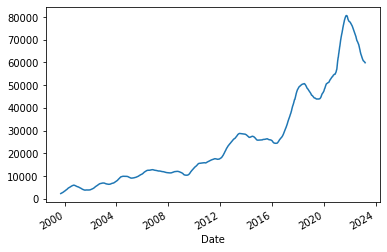

In [134]:
se.rolling(200).mean().Close.dropna().plot()

In [120]:
!pip install pyupbit -q

In [119]:
import pyupbit
# https://pyupbit.readthedocs.io/en/latest/
pyupbit.get_ohlcv()

,open,high,low,close,volume,value
2022-08-27 09:00:00,27954000.00,28150000.00,27510000.00,27739000.00,3125.26,86963182786.78
2022-08-28 09:00:00,27739000.00,27878000.00,27090000.00,27099000.00,2480.82,68413346182.69
2022-08-29 09:00:00,27098000.00,28066000.00,27094000.00,27792000.00,3709.53,102229321499.59
2022-08-30 09:00:00,27792000.00,28150000.00,27155000.00,27314000.00,4229.55,117154442399.74
2022-08-31 09:00:00,27314000.00,27957000.00,27286000.00,27530000.00,3677.30,101805940867.43
...,...,...,...,...,...,...
2023-03-10 09:00:00,27604000.00,27605000.00,26707000.00,27343000.00,9730.63,263312710191.78
2023-03-11 09:00:00,27341000.00,28023000.00,26870000.00,27737000.00,6228.74,171121003248.74
2023-03-12 09:00:00,27722000.00,29300000.00,27167000.00,29199000.00,6122.09,171678983728.68
2023-03-13 09:00:00,29190000.00,32000000.00,28855000.00,31676000.00,13888.84,423405493346.78
